In [27]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Source

In [2]:
iris = load_iris()

X = iris.data[:, 2:] # petal length and width 
y = iris.target

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

y_predict = tree_clf.predict(X)

print("Accuracy: ", accuracy_score(y, y_predict))

Accuracy:  0.96


In [30]:
dot_data = export_graphviz(tree_clf, out_file=None) 
#print(dot_data)
graph = graphviz.Source(dot_data) 

# Visualize the graph
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [31]:

dot_data = export_graphviz(
    tree_clf,
    out_file=None,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

graph = graphviz.Source(dot_data)  

graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [32]:
def decision_boundary_decision_tree(clf, X, colorBar=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 0.5, X[:, 0].max() + 0.5
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(colorBar==True):
        plt.colorbar()

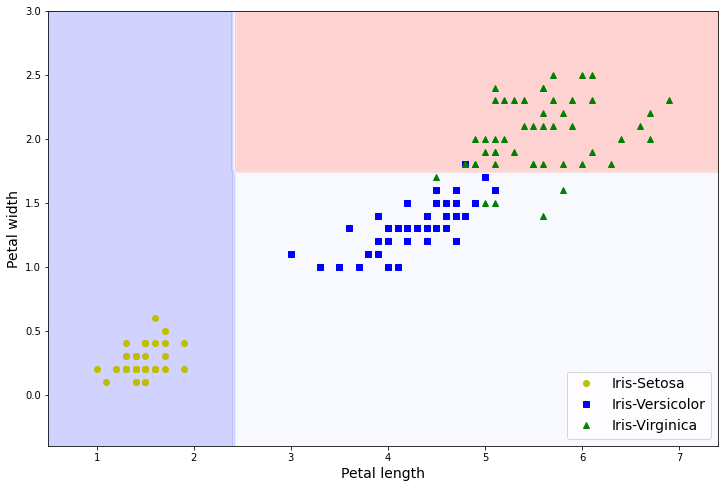

In [33]:
plt.figure(figsize=(12, 8))
decision_boundary_decision_tree(tree_clf, X)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.show()

In [34]:
print("Predicted Probabilities:\n", tree_clf.predict_proba([[2, 2]]))
print("Predicted Class: ", tree_clf.predict([[2, 2]]))

print("\nPredicted Probabilities:\n", tree_clf.predict_proba([[3, 1.9]]))
print("Predicted Class: ", tree_clf.predict([[3, 1.9]]))

Predicted Probabilities:
 [[1. 0. 0.]]
Predicted Class:  [0]

Predicted Probabilities:
 [[0.         0.02173913 0.97826087]]
Predicted Class:  [2]


In [35]:
# Get the widest Versicolor
print("Widest Versicolor: ", X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)]) 

not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)

# Get the data without the widest Versicolor
X_no_widest_versicolor = X[not_widest_versicolor]
y_no_widest_versicolor = y[not_widest_versicolor]

tree_clf_no_widest_versicolor = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_no_widest_versicolor.fit(X_no_widest_versicolor, y_no_widest_versicolor)

Widest Versicolor:  [[4.8 1.8]]


DecisionTreeClassifier(max_depth=2, random_state=40)

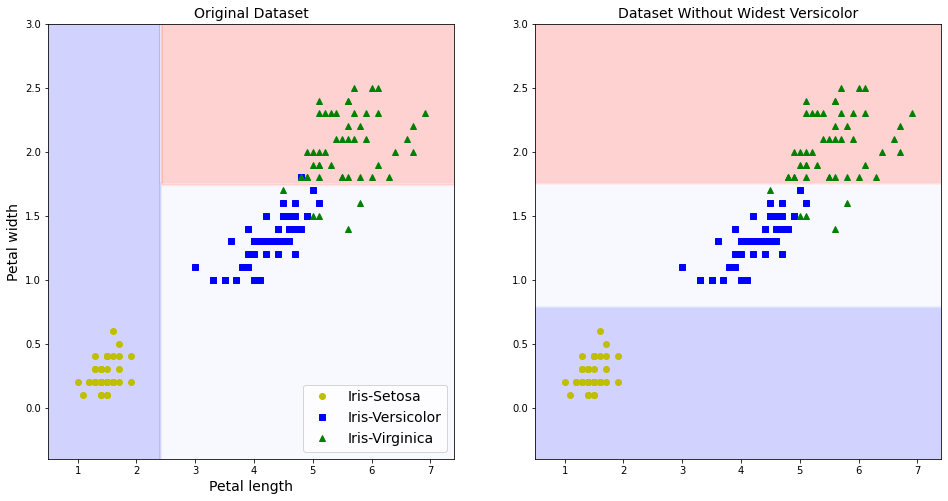

In [36]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
decision_boundary_decision_tree(tree_clf, X)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
plt.title("Original Dataset", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.subplot(122)
decision_boundary_decision_tree(tree_clf_no_widest_versicolor, X)
plt.plot(X_no_widest_versicolor[:, 0][y_no_widest_versicolor==0], 
         X_no_widest_versicolor[:, 1][y_no_widest_versicolor==0], "yo", label="Iris-Setosa")
plt.plot(X_no_widest_versicolor[:, 0][y_no_widest_versicolor==1], 
         X_no_widest_versicolor[:, 1][y_no_widest_versicolor==1], "bs", label="Iris-Versicolor")
plt.plot(X_no_widest_versicolor[:, 0][y_no_widest_versicolor==2], 
         X_no_widest_versicolor[:, 1][y_no_widest_versicolor==2], "g^", label="Iris-Virginica")

plt.title("Dataset Without Widest Versicolor", fontsize=14)

plt.show()

In [37]:
print("Prediction for a New Flower: Length & Width 2 cm")

print("Original Model:")
print(tree_clf.predict_proba([[2, 2]]))
print("Predicted Class: ", tree_clf.predict([[2, 2]]))


print("\nTweaked Model:")
print(tree_clf_no_widest_versicolor.predict_proba([[2, 2]]))
print("Predicted Class: ", tree_clf_no_widest_versicolor.predict([[2, 2]]))

Prediction for a New Flower: Length & Width 2 cm
Original Model:
[[1. 0. 0.]]
Predicted Class:  [0]

Tweaked Model:
[[0. 0. 1.]]
Predicted Class:  [2]
